In [0]:
import pandas as pd
import numpy as np
import csv

%tensorflow_version 2.x
import tensorflow as tf
tf.__version__
assert tf.__version__ >= "2.0"

from google.colab import drive
drive.mount('/content/drive')

TensorFlow 2.x selected.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
x_train = pd.read_csv('/content/drive/My Drive/bilstm_data/x_train.csv')
x_test = pd.read_csv('/content/drive/My Drive/bilstm_data/x_test.csv')
x_val = pd.read_csv('/content/drive/My Drive/bilstm_data/x_val.csv')


y_train = pd.read_csv('/content/drive/My Drive/bilstm_data/y_train.csv')
y_test = pd.read_csv('/content/drive/My Drive/bilstm_data/y_test.csv')
y_val = pd.read_csv('/content/drive/My Drive/bilstm_data/y_val.csv')


In [0]:
x_train['heading'] = x_train['heading'].str.replace('GUEST EDITORIAL:', '')
x_train['heading'] = x_train['heading'].str.replace('EDITORIAL:', '')
x_train['heading'] = x_train['heading'].str.replace('Op-Ed:', '')
x_train['heading'] = x_train['heading'].str.replace('Editorial:', '')
x_train['heading'] = x_train['heading'].str.replace('Opinion:', '')
x_train['heading'] = x_train['heading'].str.replace('Opinion', '')
x_train['heading'] = x_train['heading'].str.replace('Editorial', '')
x_train['heading'] = x_train['heading'].str.replace('Opioid', '')
x_train['heading'] = x_train['heading'].str.replace('LETTER', '')
x_train['heading'] = x_train['heading'].str.replace('Letter to the Editor:', '')
x_train['heading'] = x_train['heading'].str.replace('COLUMN:', '')

x_val['heading'] = x_val['heading'].str.replace('GUEST EDITORIAL:', '')
x_val['heading'] = x_val['heading'].str.replace('EDITORIAL:', '')
x_val['heading'] = x_val['heading'].str.replace('Op-Ed:', '')
x_val['heading'] = x_val['heading'].str.replace('Editorial:', '')
x_val['heading'] = x_val['heading'].str.replace('Opinion:', '')
x_val['heading'] = x_val['heading'].str.replace('Opinion', '')
x_val['heading'] = x_val['heading'].str.replace('Editorial', '')
x_val['heading'] = x_val['heading'].str.replace('Opioid', '')
x_val['heading'] = x_val['heading'].str.replace('LETTER', '')
x_val['heading'] = x_val['heading'].str.replace('Letter to the Editor:', '')
x_val['heading'] = x_val['heading'].str.replace('COLUMN:', '')

x_test['heading'] = x_test['heading'].str.replace('GUEST EDITORIAL:', '')
x_test['heading'] = x_test['heading'].str.replace('EDITORIAL:', '')
x_test['heading'] = x_test['heading'].str.replace('Op-Ed:', '')
x_test['heading'] = x_test['heading'].str.replace('Editorial:', '')
x_test['heading'] = x_test['heading'].str.replace('Opinion:', '')
x_test['heading'] = x_test['heading'].str.replace('Opinion', '')
x_test['heading'] = x_test['heading'].str.replace('Editorial', '')
x_test['heading'] = x_test['heading'].str.replace('Opioid', '')
x_test['heading'] = x_test['heading'].str.replace('LETTER', '')
x_test['heading'] = x_test['heading'].str.replace('Letter to the Editor:', '')
x_test['heading'] = x_test['heading'].str.replace('COLUMN:', '')


In [0]:
texts_header = x_train['heading'].values
texts_header_test = x_test['heading'].values
texts_header_val = x_val['heading'].values

In [0]:
x_train['text_col1'] = x_train.article_text.apply(lambda x:x[:150])
x_train['text_col2'] = x_train.article_text.apply(lambda x:x[-150:])

In [0]:
x_test['text_col1'] = x_test.article_text.apply(lambda x:x[:150])
x_test['text_col2'] = x_test.article_text.apply(lambda x:x[-150:])

In [0]:
x_val['text_col1'] = x_val.article_text.apply(lambda x:x[:150])
x_val['text_col2'] = x_val.article_text.apply(lambda x:x[-150:])

In [0]:
#x_train['text_col'] = x_train[['text_col1', 'text_col2']].apply(lambda x: ' '.join(x), axis=1)
#x_test['text_col'] = x_test[['text_col1', 'text_col2']].apply(lambda x: ' '.join(x), axis=1)
#x_val['text_col'] = x_val[['text_col1', 'text_col2']].apply(lambda x: ' '.join(x), axis=1)

In [0]:
texts1 = x_train['text_col1'].values
texts2 = x_train['text_col2'].values
texts_test1 = x_test['text_col1'].values
texts_test2 = x_test['text_col2'].values

In [0]:
texts_val1 = x_val['text_col1'].values
texts_val2 = x_val['text_col2'].values
labels_val = y_val['label'].values

In [0]:
labels_test = y_test['label'].values
labels = y_train['label'].values

In [0]:
print(labels.shape, labels_test.shape, labels_test.shape)

(5746,) (3429,) (3429,)


In [0]:
len(y_test.loc[y_test['label']==0])

3076

In [0]:
len(y_test.loc[y_test['label']==1])

353

In [0]:
MAX_NUM_WORDS = 3000 # how many unique words to use (i.e num rows in embedding vector)
MAX_SEQUENCE_LENGTH = 300 # max number of words in a review to use


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer_train = Tokenizer(num_words=MAX_NUM_WORDS) #convert word(string to int)
tokenizer_train.fit_on_texts(texts1)
tokenizer_train.fit_on_texts(texts2)
 
word_index = tokenizer_train.word_index #convert this to dict
print('Found %s unique tokens.' % len(word_index))


Found 26647 unique tokens.


In [0]:
sequences1_1 = tokenizer_train.texts_to_sequences(texts1) 
sequences1_2 = tokenizer_train.texts_to_sequences(texts2) 


In [0]:
sequences_header_train = tokenizer_train.texts_to_sequences(texts_header) 
sequences_header_test = tokenizer_train.texts_to_sequences(texts_header_test) 
sequences_header_val = tokenizer_train.texts_to_sequences(texts_header_val) 

In [0]:
sequences3_1 = tokenizer_train.texts_to_sequences(texts_val1) 
sequences3_2 = tokenizer_train.texts_to_sequences(texts_val2) 

sequences_test_1 = tokenizer_train.texts_to_sequences(texts_test1)
sequences_test_2 = tokenizer_train.texts_to_sequences(texts_test2)

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

data1 = pad_sequences(sequences1_1, maxlen=MAX_SEQUENCE_LENGTH, padding='pre')
data2 = pad_sequences(sequences1_2, maxlen=MAX_SEQUENCE_LENGTH, padding='pre')

labels = to_categorical(np.asarray(labels))
print('Shape of data1 tensor:', data1.shape)
print('Shape of data2 tensor:', data2.shape)
print('Shape of label tensor:', labels.shape)

Shape of data1 tensor: (5746, 300)
Shape of data2 tensor: (5746, 300)
Shape of label tensor: (5746, 2)


In [0]:
data_header = pad_sequences(sequences_header_train, maxlen = MAX_SEQUENCE_LENGTH, padding='pre')
print('Shape of header tensor:', data_header.shape)

In [0]:
data2_header = pad_sequences(sequences_header_test, maxlen=MAX_SEQUENCE_LENGTH, padding='pre')
print('Shape of header tensor:', data2_header.shape)
data3_header = pad_sequences(sequences_header_val, maxlen=MAX_SEQUENCE_LENGTH, padding='pre')
print('Shape of header tensor:', data3_header.shape)


Shape of header tensor: (3429, 300)
Shape of header tensor: (639, 300)


In [0]:
data2_1 = pad_sequences(sequences_test_1, maxlen=MAX_SEQUENCE_LENGTH, padding='pre')
data2_2 = pad_sequences(sequences_test_2, maxlen=MAX_SEQUENCE_LENGTH, padding='pre')
labels2 = to_categorical(np.asarray(labels_test))
print('Shape of data1 tensor:', data2_1.shape)
print('Shape of data2 tensor:', data2_2.shape)
print('Shape of label tensor:', labels2.shape)

data3_1 = pad_sequences(sequences3_1, maxlen=MAX_SEQUENCE_LENGTH, padding='pre')
data3_2 = pad_sequences(sequences3_2, maxlen=MAX_SEQUENCE_LENGTH, padding='pre')
labels3 = to_categorical(np.asarray(labels_val))
print('Shape of data1 tensor:', data3_1.shape)
print('Shape of data2 tensor:', data3_2.shape)
print('Shape of label tensor:', labels3.shape)


Shape of data1 tensor: (3429, 300)
Shape of data2 tensor: (3429, 300)
Shape of label tensor: (3429, 2)
Shape of data1 tensor: (639, 300)
Shape of data2 tensor: (639, 300)
Shape of label tensor: (639, 2)


In [0]:
x_train_article_1 = data1
x_train_article_2 = data2
x_train_header = data_header
y_train = labels

x_val_article_1 = data3_1
x_val_article_2 = data3_2
x_val_header = data3_header
y_val = labels3

x_test_article_1 = data2_1
x_test_article_2 = data2_2
x_test_header = data2_header
y_test = labels2

In [0]:
print(y_train.shape, y_val.shape, y_test.shape)

In [0]:
GLOVE_DIR='drive/My Drive/yelp_review_polarity_csv/'

import os
embeddings_index = {}
f = open(os.path.join(GLOVE_DIR, 'glove.42B.300d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))


Found 1917494 word vectors.


In [0]:
EMBEDDING_DIM = 300 # how big is each word vector

embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [0]:
from tensorflow.keras.layers import Embedding

embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [0]:
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, TimeDistributed, Flatten,RepeatVector, Permute, Multiply, Lambda, concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.backend import sum

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=6)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

inp0 = Input(shape=(MAX_SEQUENCE_LENGTH,))
x0 = embedded_sequences = embedding_layer(inp0)

x0 = Bidirectional(LSTM(64, return_sequences=True))(x0)
x0 = GlobalMaxPool1D()(x0)
x0 = Dense(64, activation="relu")(x0)
x0 = Dropout(0.5)(x0)

inp1 = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedded_sequences = embedding_layer(inp1)

x = Bidirectional(LSTM(64, return_sequences=True))(x)
x = GlobalMaxPool1D()(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.5)(x)


inp2 = Input(shape=(MAX_SEQUENCE_LENGTH,))
y = embedded_sequences = embedding_layer(inp2)

y = Bidirectional(LSTM(64, return_sequences=True))(y)
y = GlobalMaxPool1D()(y)
y = Dense(64, activation="relu")(y)
y = Dropout(0.5)(y)

res = concatenate([x0, x, y])
res = Dense(64, activation='relu')(res)
res = Dense(2, activation="softmax")(res)
model = Model(inputs=[inp0, inp1, inp2], outputs=res)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 300)]        0                                            
__________________________________________________________________________________________________
input_11 (InputLayer)           [(None, 300)]        0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 300, 300)     7994400     input_10[0][0]                   
                                                                 input_11[0][0]             

In [0]:
history = model.fit([x_train_article_1, x_train_article_2, x_train_header], y_train, validation_data=[[x_val_article_1, x_val_article_2, x_val_header], y_val],
                    epochs=20, callbacks=[es, mc])

Train on 5746 samples, validate on 639 samples
Epoch 1/20
5728/5746 [============================>.] - ETA: 0s - loss: 0.4131 - accuracy: 0.8073
Epoch 00001: val_accuracy improved from -inf to 0.86541, saving model to best_model.h5
5746/5746 [==============================] - 84s 15ms/sample - loss: 0.4126 - accuracy: 0.8073 - val_loss: 0.3077 - val_accuracy: 0.8654
Epoch 2/20
5728/5746 [============================>.] - ETA: 0s - loss: 0.2426 - accuracy: 0.8998
Epoch 00002: val_accuracy improved from 0.86541 to 0.89358, saving model to best_model.h5
5746/5746 [==============================] - 72s 13ms/sample - loss: 0.2420 - accuracy: 0.9001 - val_loss: 0.2847 - val_accuracy: 0.8936
Epoch 3/20
5728/5746 [============================>.] - ETA: 0s - loss: 0.1730 - accuracy: 0.9282
Epoch 00003: val_accuracy improved from 0.89358 to 0.90297, saving model to best_model.h5
5746/5746 [==============================] - 72s 13ms/sample - loss: 0.1727 - accuracy: 0.9285 - val_loss: 0.2435 - va

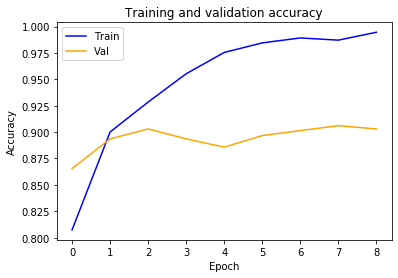

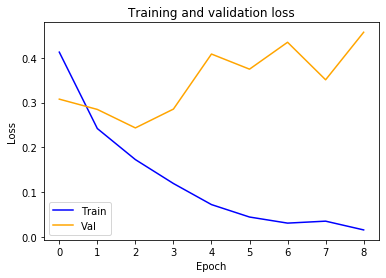

In [0]:
import matplotlib.pyplot as plt

def plot(history):
  
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  
plot(history)

In [0]:
from tensorflow.keras.models import load_model
saved_model = load_model('/content/best_model.h5')

In [0]:
y_test_new = np.argmax(y_test, axis=1)
y_test[0:5]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [0]:
y_test_new[0:5]

array([0, 0, 0, 1, 0])

In [0]:
op = saved_model.predict([x_test_article_1, x_test_article_2, x_test_header])
prediction = op
#attention_wts = op[1]
prediction[0:5]

array([[9.8375964e-01, 1.6240379e-02],
       [9.9995661e-01, 4.3346641e-05],
       [1.0000000e+00, 2.5916396e-09],
       [1.0022340e-05, 9.9998999e-01],
       [8.7286717e-01, 1.2713288e-01]], dtype=float32)

In [0]:
y_pred=np.argmax(prediction, axis=1)

In [0]:
np.sum(y_pred)

626

In [0]:
np.sum(y_test_new)

353

In [0]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test_new,y_pred)
print('Confusion Matrix : \n', cm1)

Confusion Matrix : 
 [[2774  302]
 [  29  324]]


In [0]:
from sklearn.metrics import precision_recall_fscore_support
print(precision_recall_fscore_support(y_test_new, y_pred, average='macro'))
print(precision_recall_fscore_support(y_test_new, y_pred, average='weighted'))

(0.7536129135944031, 0.9098337858297999, 0.8027989028312021, None)
(0.9410552352351316, 0.9034703995333917, 0.9146880805944928, None)


In [0]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test_new, y_pred).ravel()
pre = tp / (tp + fp)
rec = tp / (tp + fn)
tnr = tn / (tn + fp)
acc = (tp + tn)/ (tp + tn + fp + fn)
balanced_acc = (rec + tnr) / 2
f1 = 2 * (pre * rec)/(pre+rec)

print(pre, rec, tnr, acc, balanced_acc, f1)

0.5175718849840255 0.9178470254957507 0.9018205461638491 0.9034703995333917 0.9098337858297999 0.661899897854954


In [0]:
print(tp, tn, fp, fn)

324 2774 302 29


In [0]:
import math
num = (tp*tn - fp*fn)
den = math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))
print(num, den)
mcc = num/den
print(mcc)

890018 1380318.2616280927
0.6447918749913655
